In [1]:
cd ..

g:\project\MedicalDataKit


In [18]:
#import kaggle as kg
import pandas as pd
import os

from dotenv import load_dotenv
import os

# 指定 .env 文件的路径
dotenv_path = '.env'
load_dotenv(dotenv_path)

# 使用环境变量
kaggle_username = os.getenv('KAGGLE_USERNAME')
kaggle_key = os.getenv('KAGGLE_KEY')

print(kaggle_username, kaggle_key)

#kg.api.authenticate()

sitaomin 19cdc59b0ad40f6269324e5487a4f0e1


In [12]:
%load_ext autoreload
%autoreload 2

from src.dataset import BreastCancerWisconsinDataset

dataset = BreastCancerWisconsinDataset()
dataset.custom_download()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['wdbc.data', 'wdbc.names']


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
%load_ext autoreload
%autoreload 2

from src.downloader import OpenMLDownloader

downloader = OpenMLDownloader(data_id=35)
raw_data = downloader.download(data_save_dir='./data/support/')
raw_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [3]:
def count_show_unique(data):
    for col in data.columns:
        unique_values = data[col].unique().tolist()
        data_type = data[col].dtype
        num_unique = data[col].nunique()
        print(f"{col} ({data_type}) => {num_unique} values: {unique_values}")

count_show_unique(raw_data)

erythema (category) => 4 values: ['2', '3', '1', '0']
scaling (category) => 4 values: ['2', '3', '1', '0']
definite_borders (category) => 4 values: ['0', '3', '2', '1']
itching (category) => 4 values: ['3', '2', '0', '1']
koebner_phenomenon (category) => 4 values: ['0', '1', '2', '3']
polygonal_papules (category) => 4 values: ['0', '3', '2', '1']
follicular_papules (category) => 4 values: ['0', '3', '1', '2']
oral_mucosal_involvement (category) => 4 values: ['0', '3', '2', '1']
knee_and_elbow_involvement (category) => 4 values: ['1', '0', '3', '2']
scalp_involvement (category) => 4 values: ['0', '1', '2', '3']
family_history (category) => 2 values: ['0', '1']
melanin_incontinence (category) => 4 values: ['0', '1', '2', '3']
eosinophils_in_the_infiltrate (category) => 3 values: ['0', '2', '1']
PNL_infiltrate (category) => 4 values: ['0', '1', '3', '2']
fibrosis_of_the_papillary_dermis (category) => 4 values: ['0', '3', '1', '2']
exocytosis (category) => 4 values: ['3', '1', '0', '2']
ac

In [4]:
def missing_value_stats(data):
    missing_values = data.isnull().sum()
    print(missing_values)

missing_value_stats(raw_data)

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [5]:
%load_ext autoreload
%autoreload 2

from src.dataset import DermatologyDataset

dataset = DermatologyDataset()
dataset.load()
dataset.show_meta_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of rows: 366
Number of columns: 35
Sensitive features: ['Age']
Numerical features: ['Age']
Ordinal features: ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band

In [6]:
dataset.raw_data


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,3
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,3
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,2
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,2


In [7]:
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()


Number of missing values: 8
Missing value statistics:
Feature 'Age': 8 missing values

Missing pattern statistics:
Total missing patterns: 2
Top 10 missing patterns:
Pattern '00000000000000000000000000000000000': 97.81 %
Pattern '00000000000000000000000000000000010': 2.19 %


In [8]:
%load_ext autoreload
%autoreload 2

from src.downloader import RDataDownloader

downloader = RDataDownloader(dataset_path='casebase/data/support.rda', package_url = 'https://cran.r-project.org/src/contrib/casebase_0.10.6.tar.gz')
raw_data = downloader.download()
raw_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,death,sex,slos,d.time,dzgroup,dzclass,num.co,edu,scoma,...,crea,sod,ph,glucose,bun,urine,adlp,adlsc,sps,aps
0,62.84998,0,male,5,2029,Lung Cancer,Cancer,0,11,0,...,1.199951,141,7.459961,94.0,6.51,2502.0,7,7.000000,33.898438,20
1,60.33899,1,female,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,44,...,5.500000,132,7.250000,101.0,6.51,2502.0,0,1.000000,52.695312,74
2,52.74698,1,female,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,0,...,2.000000,134,7.459961,98.0,6.51,2502.0,1,0.000000,20.500000,45
3,42.38498,1,female,3,133,Lung Cancer,Cancer,2,11,0,...,0.799927,139,7.069336,225.0,6.51,2502.0,0,0.000000,20.097656,19
4,79.88495,0,female,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,3,26,...,0.799927,143,7.509766,94.0,6.51,2502.0,0,2.000000,23.500000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,66.07300,0,male,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,8,0,...,1.099854,131,7.459961,188.0,21.00,2502.0,0,0.000000,16.296875,22
9100,55.15399,0,female,29,347,Coma,Coma,1,11,41,...,5.899414,135,7.289062,190.0,49.00,0.0,0,0.000000,25.796875,31
9101,70.38196,0,male,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,14,0,...,2.699707,139,7.379883,189.0,60.00,3900.0,0,2.525391,22.699219,39
9102,47.01999,1,male,7,7,MOSF w/Malig,ARF/MOSF,1,13,0,...,3.500000,135,7.469727,246.0,55.00,2502.0,0,0.000000,40.195312,51


In [19]:
raw_data.columns

Index(['age', 'death', 'sex', 'slos', 'd.time', 'dzgroup', 'dzclass', 'num.co',
       'edu', 'scoma', 'avtisst', 'race', 'hday', 'diabetes', 'dementia', 'ca',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adlsc', 'sps', 'aps'],
      dtype='object')

In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9104 entries, 0 to 9103
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       9104 non-null   float64 
 1   death     9104 non-null   int32   
 2   sex       9104 non-null   category
 3   slos      9104 non-null   int32   
 4   d.time    9104 non-null   int32   
 5   dzgroup   9104 non-null   category
 6   dzclass   9104 non-null   category
 7   num.co    9104 non-null   int32   
 8   edu       9104 non-null   int32   
 9   scoma     9104 non-null   int32   
 10  avtisst   9104 non-null   float64 
 11  race      9104 non-null   category
 12  hday      9104 non-null   int32   
 13  diabetes  9104 non-null   int32   
 14  dementia  9104 non-null   int32   
 15  ca        9104 non-null   category
 16  meanbp    9104 non-null   float64 
 17  wblc      9104 non-null   float64 
 18  hrt       9104 non-null   float64 
 19  resp      9104 non-null   int32   
 20  temp    

In [31]:
import matplotlib.pyplot as plt
raw_data['temp'].value_counts()

temp
36.09375    503
36.19531    469
36.39844    469
36.00000    433
36.29688    382
           ... 
40.79688      1
35.40625      1
33.59375      1
32.00000      1
31.69922      1
Name: count, Length: 98, dtype: int64

: 

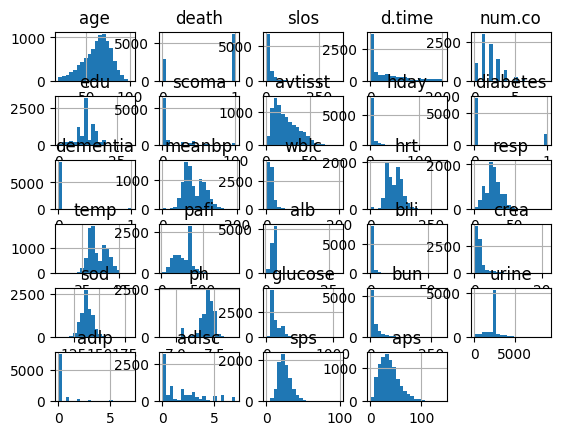

In [30]:
raw_data.hist(bins = 20)
plt.show()


<Axes: >

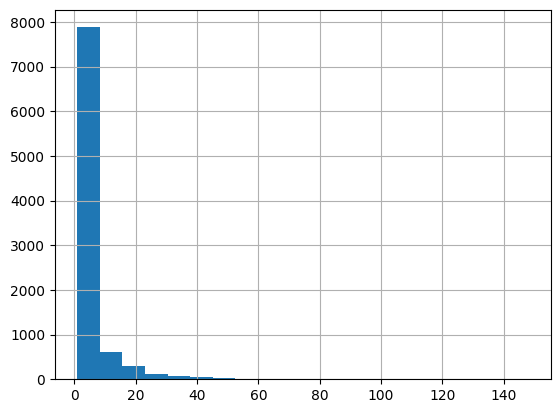

In [26]:
raw_data['hday'].hist(bins = 20)

In [11]:
import pandas as pd
pd.isna(raw_data).sum()


age         0
death       0
sex         0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
scoma       0
avtisst     0
race        0
hday        0
diabetes    0
dementia    0
ca          0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adlsc       0
sps         0
aps         0
dtype: int64